In [20]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score


with open('../data/X.pkl', 'rb') as file:
    X = pickle.load(file)

with open('../data/Y.pkl', 'rb') as file:
    y = pickle.load(file)

train_length = int((7 * X.shape[0])/10)

X_train, X_test = X[:train_length], X[train_length:]
y_train, y_test = y[:train_length], y[train_length:]


In [7]:
from sklearn.model_selection import GridSearchCV

classificator = KNeighborsClassifier()
n_list = list(range(1, 10))

param_grid = {'n_neighbors': n_list, 'p': [1, 2]}
#minkowski metrics for p 1 metric = manhattan, for p 2  metric = euclidan

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'p': [1, 2]},
             return_train_score=True, scoring='accuracy')

In [28]:
pd.DataFrame(grid_search.cv_results_).head(10)



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004513,0.005001,0.494454,0.025975,1,1,"{'n_neighbors': 1, 'p': 1}",0.79500,0.84375,0.81250,...,0.82475,0.034464,18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.002021,0.000103,0.154045,0.002803,1,2,"{'n_neighbors': 1, 'p': 2}",0.88000,0.90250,0.88375,...,0.88900,0.014435,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.002095,0.000133,0.504167,0.016255,2,1,"{'n_neighbors': 2, 'p': 1}",0.88500,0.87375,0.89125,...,0.87800,0.010683,7,0.968125,0.966875,0.975313,0.975625,0.898438,0.956875,0.029438
3,0.001982,0.000037,0.159055,0.005859,2,2,"{'n_neighbors': 2, 'p': 2}",0.89750,0.89625,0.90750,...,0.89650,0.006195,2,0.976250,0.972812,0.976562,0.975625,0.928438,0.965938,0.018797
4,0.002380,0.000439,0.533861,0.049120,3,1,"{'n_neighbors': 3, 'p': 1}",0.88875,0.88375,0.90000,...,0.88350,0.011136,6,0.980938,0.989688,0.977500,0.983750,0.902813,0.966938,0.032310
5,0.001989,0.000086,0.160419,0.001054,3,2,"{'n_neighbors': 3, 'p': 2}",0.90625,0.90625,0.91125,...,0.90475,0.004569,1,0.983750,0.987812,0.981250,0.981875,0.929688,0.972875,0.021715
6,0.001984,0.000083,0.500429,0.011036,4,1,"{'n_neighbors': 4, 'p': 1}",0.87250,0.85500,0.86625,...,0.85750,0.010695,13,0.906250,0.896563,0.907813,0.901250,0.874687,0.897312,0.011984
7,0.002041,0.000123,0.171532,0.001706,4,2,"{'n_neighbors': 4, 'p': 2}",0.89375,0.88125,0.89500,...,0.88475,0.008782,5,0.927188,0.923125,0.928125,0.922500,0.903438,0.920875,0.008991
8,0.001999,0.000053,0.500668,0.010074,5,1,"{'n_neighbors': 5, 'p': 1}",0.87125,0.85500,0.88125,...,0.86200,0.012160,12,0.912813,0.904687,0.911250,0.901250,0.878437,0.901687,0.012369
9,0.001919,0.000058,0.173948,0.006100,5,2,"{'n_neighbors': 5, 'p': 2}",0.89375,0.89000,0.90500,...,0.88925,0.010386,3,0.930000,0.930000,0.932813,0.923438,0.909375,0.925125,0.008456


0.9115764979639325

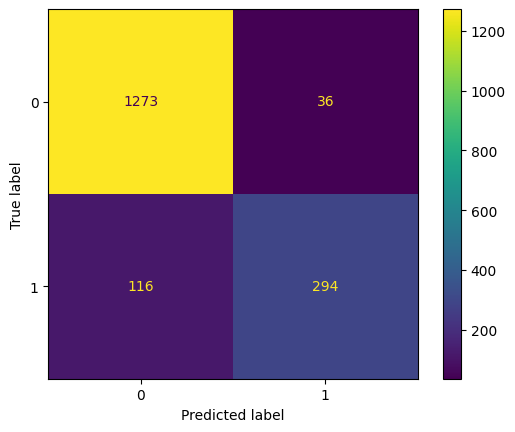

In [21]:
classificator = KNeighborsClassifier(n_neighbors = grid_search.best_params_['n_neighbors'], p=grid_search.best_params_['p'])
classificator.fit(X_train, y_train)

predict = classificator.predict(X_test.toarray())

cm = confusion_matrix(y_test, predict)
cm_display = ConfusionMatrixDisplay(cm).plot()
accuracy_score(y_test, predict)
